In [162]:
from numpy.random import seed
seed(888)

#from tensorflow import set_random_seed
#set_random_seed(4112)
import tensorflow
tensorflow.random.set_seed(112)

In [163]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten   
from keras.optimizers import Adam
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [164]:
# Getting the dataset as a Tuple
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [165]:
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [166]:
# Split the training set into a new training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [167]:
# One-hot encode the labels
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# BUILDING THE FIRST MODEL

In [168]:
# Build the first neural network (CNN)
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))
model1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [169]:
model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 2304)              0         
                                                                 
 dense_23 (Dense)            (None, 10)              

In [170]:
# Train the first model on the training set and evaluate on the validation set
history = model1.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/15
875/875 [==============================] - 17s 19ms/step - loss: 2.5654 - accuracy: 0.2781 - val_loss: 1.7825 - val_accuracy: 0.3499
Epoch 2/15
875/875 [==============================] - 17s 20ms/step - loss: 1.6345 - accuracy: 0.4111 - val_loss: 1.4906 - val_accuracy: 0.4706
Epoch 3/15
875/875 [==============================] - 17s 19ms/step - loss: 1.4436 - accuracy: 0.4874 - val_loss: 1.5028 - val_accuracy: 0.4724
Epoch 4/15
875/875 [==============================] - 16s 19ms/step - loss: 1.3484 - accuracy: 0.5260 - val_loss: 1.3936 - val_accuracy: 0.5076
Epoch 5/15
875/875 [==============================] - 16s 19ms/step - loss: 1.2772 - accuracy: 0.5548 - val_loss: 1.3749 - val_accuracy: 0.5234
Epoch 6/15
875/875 [==============================] - 17s 20ms/step - loss: 1.2084 - accuracy: 0.5790 - val_loss: 1.3977 - val_accuracy: 0.5294
Epoch 7/15
875/875 [==============================] - 18s 21ms/step - loss: 1.1524 - accuracy: 0.6026 - val_loss: 1.2764 - val_accuracy:

In [171]:
model1.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [172]:
metrics1 = pd.DataFrame(model1.history.history)
metrics1

,loss,accuracy,val_loss,val_accuracy
0,2.565359,0.278107,1.782479,0.349857
1,1.634534,0.411143,1.490646,0.470571
2,1.443573,0.487357,1.502835,0.472429
3,1.348395,0.526036,1.393576,0.507571
4,1.277175,0.554821,1.374942,0.523429
5,1.208384,0.579036,1.397706,0.529429
6,1.152403,0.602643,1.276410,0.560714
7,1.103430,0.618536,1.305155,0.562429
8,1.050607,0.637571,1.447024,0.533000
9,1.021166,0.648000,1.338695,0.563714


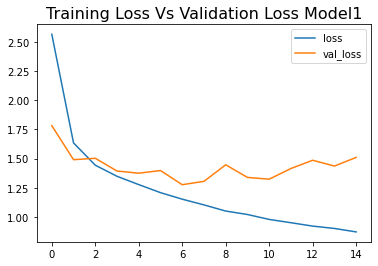

In [173]:
metrics1[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss Model1', fontsize=16)
plt.show()

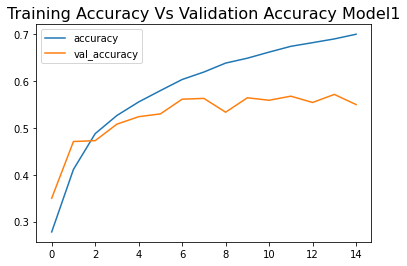

In [174]:
metrics1[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy Model1', fontsize=16)
plt.show()

# BUILDING THE SECOND MODEL

In [175]:
# Build the second neural network (CNN)
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',)) 
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(64, activation='relu'))

model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




In [176]:
model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 2, 2, 64)       

In [177]:
# Train the second model on the training set and evaluate on the validation set
history = model2.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/15
875/875 [==============================] - 21s 23ms/step - loss: 1.9359 - accuracy: 0.3359 - val_loss: 1.5626 - val_accuracy: 0.4249
Epoch 2/15
875/875 [==============================] - 19s 21ms/step - loss: 1.5025 - accuracy: 0.4584 - val_loss: 1.4825 - val_accuracy: 0.4611
Epoch 3/15
875/875 [==============================] - 20s 23ms/step - loss: 1.3543 - accuracy: 0.5167 - val_loss: 1.3586 - val_accuracy: 0.5127
Epoch 4/15
875/875 [==============================] - 21s 24ms/step - loss: 1.2495 - accuracy: 0.5556 - val_loss: 1.3820 - val_accuracy: 0.5077
Epoch 5/15
875/875 [==============================] - 20s 23ms/step - loss: 1.1632 - accuracy: 0.5913 - val_loss: 1.2524 - val_accuracy: 0.5561
Epoch 6/15
875/875 [==============================] - 21s 24ms/step - loss: 1.0930 - accuracy: 0.6178 - val_loss: 1.2461 - val_accuracy: 0.5600
Epoch 7/15
875/875 [==============================] - 22s 25ms/step - loss: 1.0353 - accuracy: 0.6379 - val_loss: 1.2264 - val_accuracy:

In [178]:
model2.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [179]:
metrics2 = pd.DataFrame(model2.history.history)
metrics2

,loss,accuracy,val_loss,val_accuracy
0,1.935875,0.335857,1.562650,0.424857
1,1.502547,0.458357,1.482454,0.461143
2,1.354303,0.516750,1.358642,0.512714
3,1.249531,0.555607,1.382011,0.507714
4,1.163176,0.591286,1.252409,0.556143
5,1.093005,0.617821,1.246141,0.560000
6,1.035281,0.637893,1.226363,0.571143
7,0.969605,0.659464,1.232043,0.576429
8,0.908705,0.680464,1.238161,0.590143
9,0.873911,0.693821,1.265396,0.586571


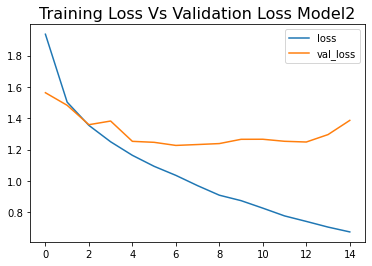

In [180]:
metrics2[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss Model2', fontsize=16)
plt.show()

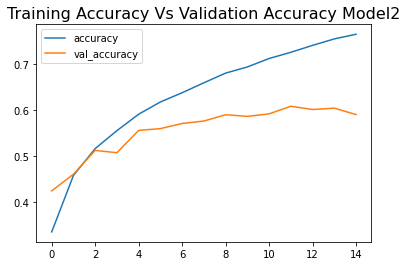

In [181]:
metrics2[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy Model2', fontsize=16)
plt.show()

In [182]:
# Compare the performance of the two models on the validation set
val_loss1, val_acc1 = model1.evaluate(X_val, y_val)
val_loss2, val_acc2 = model2.evaluate(X_val, y_val)

219/219 [==============================] - 2s 7ms/step - loss: 1.3861 - accuracy: 0.5904


In [140]:
# Compare the performance of the two models on the test set
test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
test_loss2, test_acc2 = model2.evaluate(X_test, y_test)


469/469 [==============================] - 3s 6ms/step - loss: 1.2536 - accuracy: 0.6291


# Classification Report and Confusion Matrix  

In [141]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the validation set
#y_pred = model1.predict(X_val)
y_pred = model2.predict(X_val)

# Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)
y_val = np.argmax(y_val, axis=1)

219/219 [==============================] - 2s 8ms/step


In [142]:
# Print the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65       714
           1       0.84      0.66      0.74       733
           2       0.55      0.53      0.54       705
           3       0.48      0.42      0.45       700
           4       0.57      0.54      0.55       727
           5       0.43      0.65      0.52       650
           6       0.74      0.64      0.68       691
           7       0.62      0.74      0.67       719
           8       0.73      0.75      0.74       686
           9       0.73      0.69      0.71       675

    accuracy                           0.62      7000
   macro avg       0.64      0.62      0.63      7000
weighted avg       0.64      0.62      0.63      7000



In [143]:
# Print the confusion matrix
print(confusion_matrix(y_val, y_pred))

[[449  16  61  19  24  22   8  29  64  22]
 [ 34 485  15  11   4  17  17  10  45  95]
 [ 44   1 372  41  72  88  19  49  11   8]
 [ 11   0  29 292  47 212  45  45  11   8]
 [ 26   3  61  41 394  71  29  87   8   7]
 [  4   3  29  73  38 420  16  58   1   8]
 [  3   2  53  73  52  47 439  10   9   3]
 [  7   0  30  24  44  63   6 533   6   6]
 [ 64  17  18  20  14  13   5   7 512  16]
 [ 31  52   9  15   6  17   8  36  34 467]]
